In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns 
import matplotlib as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import root_mean_squared_error,mean_squared_error
import pickle
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor




# Load the Data

In [3]:
Jan_df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
Feb_df=pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')

In [4]:
import os 
os.makedirs('data',exist_ok=True)

Jan_df.to_csv('data/train_data.csv',index=False)
Feb_df.to_csv('data/valid_data.csv',index=False)

# Initially Explore Data

In [5]:
Jan_df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [6]:
Feb_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-02-01 00:15:53,2024-02-01 00:24:20,N,1.0,75,161,1.0,2.77,13.5,1.0,0.5,3.75,0.0,NaN,1.0,22.50,1.0,1.0,2.75
1,2,2024-01-31 22:59:22,2024-01-31 23:27:14,N,1.0,43,242,1.0,7.76,36.6,1.0,0.5,0.00,0.0,NaN,1.0,39.10,2.0,1.0,0.00
2,2,2024-02-01 00:30:29,2024-02-01 00:35:32,N,1.0,75,238,1.0,1.03,7.9,1.0,0.5,2.60,0.0,NaN,1.0,13.00,1.0,1.0,0.00
3,2,2024-01-31 23:56:42,2024-02-01 00:06:53,N,1.0,80,17,2.0,1.36,11.4,1.0,0.5,4.17,0.0,NaN,1.0,18.07,1.0,1.0,0.00
4,2,2024-02-01 00:31:14,2024-02-01 00:31:16,N,5.0,95,264,1.0,0.00,50.0,0.0,0.0,1.00,0.0,NaN,1.0,52.00,1.0,2.0,0.00


In [7]:
Jan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

In [8]:
Jan_df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        3415
RatecodeID                3415
PULocationID                 0
DOLocationID                 0
passenger_count           3415
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                56551
improvement_surcharge        0
total_amount                 0
payment_type              3415
trip_type                 3418
congestion_surcharge      3415
dtype: int64

# Feature Engineering

#### we are going to use the tpep_pickup_datetime  and tpep_dropoff_datetime to get the trip duration 


In [9]:
Jan_df['trip_duration_min']=(Jan_df['lpep_dropoff_datetime']-Jan_df['lpep_pickup_datetime']).dt.total_seconds()/60

In [10]:
Jan_df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.80,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.30,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.80,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.20,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.60,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56546,2,2024-01-31 20:46:00,2024-01-31 20:55:00,None,NaN,33,25,NaN,0.00,11.58,...,0.0,3.14,0.0,NaN,1.0,15.72,NaN,NaN,NaN,9.000000
56547,2,2024-01-31 21:06:00,2024-01-31 21:11:00,None,NaN,72,72,NaN,0.49,11.58,...,0.0,0.00,0.0,NaN,1.0,12.58,NaN,NaN,NaN,5.000000
56548,2,2024-01-31 21:36:00,2024-01-31 21:40:00,None,NaN,72,72,NaN,0.52,11.58,...,0.0,2.52,0.0,NaN,1.0,15.10,NaN,NaN,NaN,4.000000
56549,2,2024-01-31 22:45:00,2024-01-31 22:51:00,None,NaN,41,42,NaN,1.17,14.22,...,0.0,0.00,0.0,NaN,1.0,15.22,NaN,NaN,NaN,6.000000


<Axes: xlabel='trip_duration_min', ylabel='Count'>

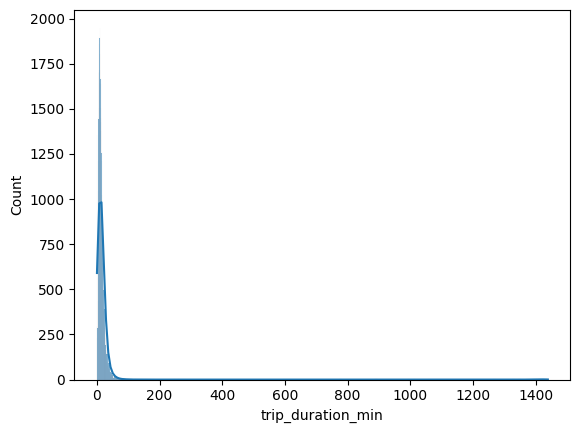

In [11]:
sns.histplot(Jan_df['trip_duration_min'], kde=True)

In [12]:
Jan_df['trip_duration_min'].describe(percentiles=[0.95,0.98,0.99])

count    56551.000000
mean        18.171379
std         75.464751
min          0.000000
50%         11.400000
95%         33.683333
98%         46.816667
99%         59.825000
max       1438.983333
Name: trip_duration_min, dtype: float64

In [13]:
Jan_df_2=Jan_df[(Jan_df['trip_duration_min'] >=1)&(Jan_df['trip_duration_min'] <=60)]

In [14]:
Jan_df_2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration_min
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,...,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75,11.500000
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,...,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75,20.866667
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,...,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75,19.033333
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,...,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00,11.866667
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,...,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00,10.983333


In [15]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']

Jan_df_2[categorical]=Jan_df_2[categorical].astype('category')

C:\Users\HP\AppData\Local\Temp\ipykernel_7484\2021245415.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Jan_df_2[categorical]=Jan_df_2[categorical].astype('category')


In [16]:
Jan_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54373 entries, 0 to 56550
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               54373 non-null  int32         
 1   lpep_pickup_datetime   54373 non-null  datetime64[us]
 2   lpep_dropoff_datetime  54373 non-null  datetime64[us]
 3   store_and_fwd_flag     51062 non-null  object        
 4   RatecodeID             51062 non-null  float64       
 5   PULocationID           54373 non-null  category      
 6   DOLocationID           54373 non-null  category      
 7   passenger_count        51062 non-null  float64       
 8   trip_distance          54373 non-null  float64       
 9   fare_amount            54373 non-null  float64       
 10  extra                  54373 non-null  float64       
 11  mta_tax                54373 non-null  float64       
 12  tip_amount             54373 non-null  float64       
 13  tolls_

In [17]:
train_dic=Jan_df_2[numerical+categorical].to_dict(orient='records')


In [18]:
dv=DictVectorizer()
X_train=dv.fit_transform(train_dic)

In [19]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 163119 stored elements and shape (54373, 3)>

In [20]:
target='trip_duration_min'
y_train=Jan_df_2[target].values

# Train model

In [21]:
Lr= LinearRegression()
Lr.fit(X_train,y_train)


LinearRegression()

##### predicting on the train is not ideal as it exposes the model
##### but for learnnig purpose lets use it 

In [22]:
y_pred=Lr.predict(X_train)

mse=mean_squared_error(y_train,y_pred)
rmse=np.sqrt(mse)

rmse

np.float64(8.944081902346614)

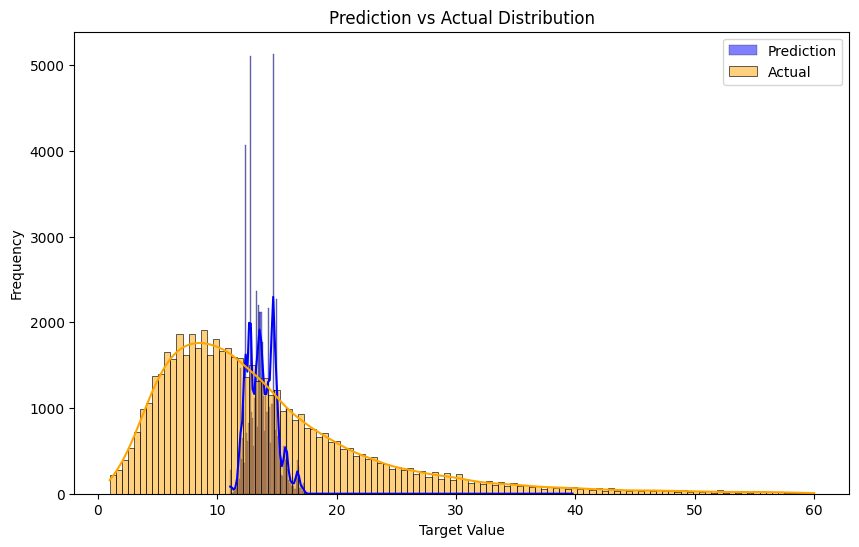

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))  # Set figure size

sns.histplot(y_pred, label='Prediction', kde=True, color='blue')
sns.histplot(y_train, label='Actual', kde=True, color='orange')

plt.legend()
plt.title('Prediction vs Actual Distribution')
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.show()

# Let's put the preprocessing in a function

In [24]:
def read_and_preprocess(filename):
    df=pd.read_parquet(filename)
    df['trip_duration_min']=(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']).dt.total_seconds()/60
    df=df[(df['trip_duration_min'] >=1)&(df['trip_duration_min'] <=60)]

    categorical=['PULocationID','DOLocationID']
    #numerical=['trip_distance']

    df[categorical]=df[categorical].astype('category')
    return df



In [25]:
df_train=read_and_preprocess('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet')
df_valid=read_and_preprocess('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')

In [26]:
categorical=['PULocationID','DOLocationID']
numerical=['trip_distance']


dv=DictVectorizer()
train_dic=df_train[numerical+categorical].to_dict(orient='records')
X_train=dv.fit_transform(train_dic)

val_dic=df_valid[numerical+categorical].to_dict(orient='records')
X_val=dv.transform(val_dic)




In [27]:
target='trip_duration_min'
y_train=df_train[target].values

y_valid=df_valid[target].values

In [28]:
Lr= LinearRegression()
Lr.fit(X_train,y_train)

y_pred=Lr.predict(X_val)

mse=mean_squared_error(y_valid,y_pred)
rmse=np.sqrt(mse)

rmse

np.float64(9.02359102460649)

In [29]:

params={'alpha':0.01}
Ls= Lasso(**params)

Ls.fit(X_train,y_train)

y_pred=Ls.predict(X_val)

mse=mean_squared_error(y_valid,y_pred)
rmse=np.sqrt(mse)

rmse

np.float64(9.023594007015081)

In [30]:
import os

os.makedirs('models', exist_ok=True)  # Create folder if it doesn't exist

with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, Lr), f_out)

In [31]:
import mlflow

mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('nyc-taxi-experiment')


<Experiment: artifact_location='mlflow-artifacts:/596310372276179798', creation_time=1747021585742, experiment_id='596310372276179798', last_update_time=1747021585742, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>

In [32]:
import mlflow
with mlflow.start_run():
    
    mlflow.log_params(params)
    mlflow.log_param("train-data-path","./data/train_data.csv")
    mlflow.log_param("valid-data-path","data/valid_data.csv")
    mlflow.log_metric("root_mean_square_error",rmse)
    mlflow.set_tag("baseline_model","Nii Sowah")
    ##mlflow.log_artifact(local_path='models/lin_reg.bin',artifact_path="model/pickle")



🏃 View run exultant-ram-502 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/e0430d6dc9944e598981b808680f5bfb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798


In [35]:
import xgboost as xgb
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials
from hyperopt.pyll import scope


dtrain=xgb.DMatrix(X_train,label=y_train)
dvalid=xgb.DMatrix(X_val,label=y_valid)


In [36]:
def objective(params):

    with mlflow.start_run():
        mlflow.set_tag("model","xgboost")
        mlflow.log_params(params)
        booster=xgb.train(
            params=params,
            dtrain=dtrain,
            num_boost_round=15,
            evals=[(dvalid,"validation")],
            early_stopping_rounds=10
        )
        y_pred=booster.predict(dvalid)
        rmse=mean_squared_error(y_valid,y_pred)
        rmse_=np.sqrt(rmse)
        mlflow.log_metric("rmse",rmse_)
    
    return {"loss":rmse_,'status':STATUS_OK}


In [38]:
search_space={
    'max_depth':scope.int(hp.uniform('max_depth',3, 10)),
    'learning_rate':hp.loguniform('learning_rate',-3,0),
    'reg_alpha':hp.loguniform('reg_alpha',-5,-1),
    'reg_lambda':hp.loguniform('reg_lambda',-6,-1),
    'min_child_weight':hp.loguniform('min_child_weight',-1,3),
    'objective':'reg:linear',
    'seed':42
}

best_results= fmin(fn=objective,
        space=search_space,
        algo=tpe.suggest,
        max_evals=50,
        trials=Trials())

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

[0]	validation-rmse:8.72498                           
[1]	validation-rmse:8.37853                           
[2]	validation-rmse:8.06576                           
[3]	validation-rmse:7.78655                           
[4]	validation-rmse:7.53579                           
[5]	validation-rmse:7.31298                           
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[6]	validation-rmse:7.11268                           
[7]	validation-rmse:6.93690                           
[8]	validation-rmse:6.77851                           
[9]	validation-rmse:6.64022                           
[10]	validation-rmse:6.51542                          
[11]	validation-rmse:6.40617                          
[12]	validation-rmse:6.31080                          
[13]	validation-rmse:6.22643                          
[14]	validation-rmse:6.15056                          
🏃 View run serious-loon-315 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/071e028510994b43a55fb7e00a20336d

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798

[0]	validation-rmse:5.48843                                                    
[1]	validation-rmse:5.39556                                                    
[2]	validation-rmse:5.33947                                                    
[3]	validation-rmse:5.35378                                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.32769                                                   
[11]	validation-rmse:5.32633                                                   
[12]	validation-rmse:5.33192                                                   
[13]	validation-rmse:5.34191                                                   
[14]	validation-rmse:5.34653                                                   
🏃 View run bittersweet-fly-548 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/afebd6bdfbb042b7bc39e47e9d11e431

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:8.27975                                                    
[1]	validation-rmse:7.62122                                                    
[2]	validation-rmse:7.09883                                                    
[3]	validation-rmse:6.69477                                                    
[4]	validation-rmse:6.36886                                            

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[9]	validation-rmse:5.59613                                                    
[10]	validation-rmse:5.51632                                                   
[11]	validation-rmse:5.46227                                                   
[12]	validation-rmse:5.42247                                                   
[13]	validation-rmse:5.38328                                                   
[14]	validation-rmse:5.35340                                                   
🏃 View run zealous-fly-23 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/28d2b391bf52452d858984ea35b8000b

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:8.29337                                                    
[1]	validation-rmse:7.63787                                                    
[2]	validation-rmse:7.11763                                                    
[3]	validation-rmse:6.70073                                                 

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.46581                                                   
[11]	validation-rmse:5.40280                                                   
[12]	validation-rmse:5.35374                                                   
[13]	validation-rmse:5.31870                                                   
[14]	validation-rmse:5.29065                                                   
🏃 View run calm-lynx-832 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/9f1e3c09096d44a5a35986a708319422

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:8.72986                                                    
[1]	validation-rmse:8.38491                                                    
[2]	validation-rmse:8.07362                                                    
[3]	validation-rmse:7.79155                                                    
[4]	validation-rmse:7.53791                                                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[13]	validation-rmse:6.15084
[14]	validation-rmse:6.06624                                                   
🏃 View run bouncy-mink-932 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/f562ff10a8f746c99db6c19bc2808153

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:7.01686                                                    
[1]	validation-rmse:6.16010                                                    
[2]	validation-rmse:5.82869                                                    
[3]	validation-rmse:5.64151                                                    
[4]	validation-rmse:5.58207                                                    
[5]	validation-rmse:5.51278                                                    
[6]	validation-rmse:5.48426                                                    
[7]	validation-rmse:5.44154                                                    
[8]	validation-rmse:5.42451                   

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[13]	validation-rmse:5.35330                                                   
[14]	validation-rmse:5.34409                                                   
🏃 View run nosy-fowl-102 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/da37dc23e2484b1ea2ab7dc56a7eed8f

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:7.55873                                                    
[1]	validation-rmse:6.59607                                                    
[2]	validation-rmse:6.01858                                                    
[3]	validation-rmse:5.64952                                                    
[4]	validation-rmse:5.43953                                                    
[5]	validation-rmse:5.32119                                                    
[6]	validation-rmse:5.24913                                                    
 12%|█▏        | 6/50 [00:04<00:26,  1.64trial/s, best loss: 5.29064845856923

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[7]	validation-rmse:5.20807                                                    
[8]	validation-rmse:5.17491                                                    
[9]	validation-rmse:5.15266                                                    
[10]	validation-rmse:5.12663                                                   
[11]	validation-rmse:5.11680                                                   
[12]	validation-rmse:5.10971                                                   
[13]	validation-rmse:5.10578                                                   
[14]	validation-rmse:5.09381                                                   
🏃 View run spiffy-ram-466 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/9def88e17d474cae914699f0f5c3e454

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:6.93122                                                    
[1]	validation-rmse:6.00041                                                 

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[13]	validation-rmse:5.15444
[14]	validation-rmse:5.14703                                                   
🏃 View run tasteful-auk-669 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/bdf00a4a0d004ed989b7a1e83b286bc7

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:8.68553                                                    
[1]	validation-rmse:8.30816                                                    
[2]	validation-rmse:7.97235                                                    
[3]	validation-rmse:7.67443                                                    
[4]	validation-rmse:7.41142                                                    
[5]	validation-rmse:7.18181                                                    
[6]	validation-rmse:6.97936                                                    
[7]	validation-rmse:6.79955                                                    
[8]	validation-rmse:6.64340                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



🏃 View run handsome-hound-953 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/1d4edafbe7bc4e758e62d386154f3ae6

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:7.32725                                                    
[1]	validation-rmse:6.37601                                                    
[2]	validation-rmse:5.90018                                                    
[3]	validation-rmse:5.64245                                                    
[4]	validation-rmse:5.50807                                                    
[5]	validation-rmse:5.42421                                                    
[6]	validation-rmse:5.38301                                                    
[7]	validation-rmse:5.33780                                                    
[8]	validation-rmse:5.29869                                                    
[9]	validation-rmse:5.26856                                             

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[11]	validation-rmse:5.25647                                                   
[12]	validation-rmse:5.24707                                                   
[13]	validation-rmse:5.23471                                                   
[14]	validation-rmse:5.22566                                                   
🏃 View run upbeat-hen-529 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/5f12bed91ff84ca38ad745ee39a2b837

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

[0]	validation-rmse:5.77461                                                     
[1]	validation-rmse:5.34023                                                     
[2]	validation-rmse:5.27026                                                     
[3]	validation-rmse:5.22462                                                     
[4]	validation-rmse:5.19371                                                     
[5]	validation-rmse:5.19200                                            

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[11]	validation-rmse:5.18849
[12]	validation-rmse:5.19277                                                    
[13]	validation-rmse:5.20161                                                    
[14]	validation-rmse:5.19965                                                    
🏃 View run bemused-fly-590 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/9a60edd5395948768c06fd1433beb9d2

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:5.46442                                                     
[1]	validation-rmse:5.35167                                                     
[2]	validation-rmse:5.35334                                                     
[3]	validation-rmse:5.32439                                                     
[4]	validation-rmse:5.33578                                                     
[5]	validation-rmse:5.32778                                                     
[6]	validation-rmse:5.33090         

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[7]	validation-rmse:5.34097                                                     
[8]	validation-rmse:5.34395                                                     
[9]	validation-rmse:5.35922                                                     
[10]	validation-rmse:5.35696                                                    
[11]	validation-rmse:5.35309                                                    
[12]	validation-rmse:5.36037                                                    
[13]	validation-rmse:5.36667                                                    
🏃 View run likeable-midge-445 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/f2a45b44bd1d462ca6182550918f5cee

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.98016                                                     
[1]	validation-rmse:7.18355                                                     
[2]	validation-rmse:6.63743                                   

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[12]	validation-rmse:5.42900                                                    
[13]	validation-rmse:5.40853                                                    
[14]	validation-rmse:5.38242                                                    
🏃 View run mysterious-quail-965 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/c7d9e01044fb40b9a36919999a36545a

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.39083                                                     
[1]	validation-rmse:7.80446                                                     
[2]	validation-rmse:7.32747                                                     
[3]	validation-rmse:6.94878                                                     
[4]	validation-rmse:6.64084                                                     
[5]	validation-rmse:6.39088                                                     
[6]	validation-rmse:6.19376                                 

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.74150
[11]	validation-rmse:5.67855                                                    
[12]	validation-rmse:5.63078                                                    
[13]	validation-rmse:5.58592                                                    
[14]	validation-rmse:5.55154                                                    
🏃 View run selective-midge-449 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/d255eafc6d054ab98fab2f5cf5b79c69

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.39165                                                     
[1]	validation-rmse:6.43075                                                     
[2]	validation-rmse:5.90178                                                     
[3]	validation-rmse:5.61458                                                     
[4]	validation-rmse:5.46961                                                     
[5]	validation-rmse:5.36897     

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[14]	validation-rmse:5.17169                                                    
🏃 View run skittish-fawn-227 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/be7a1db6ec2d4902a60cc5ea7258fec3

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.06636                                                     
[1]	validation-rmse:6.19919                                                     
[2]	validation-rmse:5.84973                                                     
[3]	validation-rmse:5.68015                                                     
[4]	validation-rmse:5.60998                                                     
[5]	validation-rmse:5.55935                                                     
[6]	validation-rmse:5.48854                                                     
[7]	validation-rmse:5.46947                                                     
[8]	validation-rmse:5.44549                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



🏃 View run flawless-loon-852 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/9b58742f41c54803b0de57fbc9c57f0d

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:5.94357                                                     
[1]	validation-rmse:5.40048                                                     
[2]	validation-rmse:5.28134                                                     
[3]	validation-rmse:5.23921                                                     
[4]	validation-rmse:5.21787                                                     
[5]	validation-rmse:5.18872                                                     
[6]	validation-rmse:5.18133                                                     
[7]	validation-rmse:5.15586                                                     
[8]	validation-rmse:5.15458                                                     
[9]	validation-rmse:5.15375                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[11]	validation-rmse:5.15484                                                    
[12]	validation-rmse:5.14935                                                    
[13]	validation-rmse:5.14777                                                    
[14]	validation-rmse:5.14992                                                    
🏃 View run judicious-midge-350 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/68f76429402145aaa1a7e2a744030f02

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.60964                                                     
[1]	validation-rmse:6.74717                                                     
[2]	validation-rmse:6.29228                                                     
[3]	validation-rmse:6.01813                                                     
[4]	validation-rmse:5.86596                                                     
[5]	validation-rmse:5.77867                                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



🏃 View run nebulous-sponge-820 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/0acd4c358844475ea8df1a776fb77419

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.17401                                                     
[1]	validation-rmse:7.46192                                                     
[2]	validation-rmse:6.92220                                                     
[3]	validation-rmse:6.51309                                                     
[4]	validation-rmse:6.21569                                                     
[5]	validation-rmse:5.99296                                                     
[6]	validation-rmse:5.83015                                                     
[7]	validation-rmse:5.71036                                                     
 36%|███▌      | 18/50 [00:10<00:16,  1.88trial/s, best loss: 5.093812380196987]

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[8]	validation-rmse:5.62150                                                     
[9]	validation-rmse:5.55211                                                     
[10]	validation-rmse:5.49821                                                    
[11]	validation-rmse:5.45289                                                    
[12]	validation-rmse:5.42025                                                    
[13]	validation-rmse:5.38956                                                    
[14]	validation-rmse:5.37022                                                    
🏃 View run wistful-goose-310 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/d76fa82a2b9444e69262130a42715062

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.76833                                                     
[1]	validation-rmse:8.45683                                                     
[2]	validation-rmse:8.17219                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



🏃 View run delicate-stag-212 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/68fda734f9fe4d00beedb8d676a5da38

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.36863                                                     
[1]	validation-rmse:5.58666                                                     
[2]	validation-rmse:5.37438                                                     
[3]	validation-rmse:5.29305                                                     
[4]	validation-rmse:5.25881                                                     
[5]	validation-rmse:5.23429                                                     
[6]	validation-rmse:5.22034                                                     
[7]	validation-rmse:5.21540                                                     
[8]	validation-rmse:5.20228                                                     
[9]	validation-rmse:5.20874                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[12]	validation-rmse:5.19569                                                    
[13]	validation-rmse:5.18424                                                    
[14]	validation-rmse:5.18374                                                    
🏃 View run merciful-zebra-500 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/c95f35f5f7114597a8bc94756eab28be

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.73671                                                     
[1]	validation-rmse:6.82250                                                     
[2]	validation-rmse:6.22341                                                     
[3]	validation-rmse:5.82150                                                     
[4]	validation-rmse:5.58716                                                     
[5]	validation-rmse:5.43671                                                     
[6]	validation-rmse:5.34338                                   

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[8]	validation-rmse:5.23819
[9]	validation-rmse:5.20521                                                     
[10]	validation-rmse:5.18546                                                    
[11]	validation-rmse:5.17296                                                    
[12]	validation-rmse:5.15803                                                    
[13]	validation-rmse:5.14521                                                    
[14]	validation-rmse:5.13014                                                    
🏃 View run colorful-snail-824 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/67f0ff0d99d84fd1bf82b913836c6814

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.54022                                                     
[1]	validation-rmse:8.04615                                                     
[2]	validation-rmse:7.62154                                                     
[3]	validation-rmse:7.25791       

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[12]	validation-rmse:5.67143                                                    
[13]	validation-rmse:5.60605                                                    
[14]	validation-rmse:5.54934                                                    
🏃 View run exultant-jay-421 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/95aad00ba3214d3fb9890e01c2b1a5ea

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.70861                                                     
[1]	validation-rmse:6.78381                                                     
[2]	validation-rmse:6.18946                                                     
[3]	validation-rmse:5.81233                                                     
[4]	validation-rmse:5.56017                                                     
[5]	validation-rmse:5.41806                                                     
[6]	validation-rmse:5.32669                                     

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.17263                                                    
[11]	validation-rmse:5.16160                                                    
[12]	validation-rmse:5.15269                                                    
[13]	validation-rmse:5.13423                                                    
[14]	validation-rmse:5.12765                                                    
🏃 View run fortunate-hawk-939 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/88bef6ae132b4a4c95c5c9054e8259b0

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.80591                                                     
[1]	validation-rmse:6.90973                                                     
[2]	validation-rmse:6.31223                                                     
[3]	validation-rmse:5.91844                                                     
[4]	validation-rmse:5.64633                                   

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[6]	validation-rmse:5.37244
[7]	validation-rmse:5.29533                                                     
[8]	validation-rmse:5.24635                                                     
[9]	validation-rmse:5.21010                                                     
[10]	validation-rmse:5.18439                                                    
[11]	validation-rmse:5.16373                                                    
[12]	validation-rmse:5.14518                                                    
[13]	validation-rmse:5.13435                                                    
[14]	validation-rmse:5.12145                                                    
🏃 View run delicate-cod-248 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/09351a6513ee4e3290f8673beeb020f9

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.95101                                                     
[1]	validation-rmse:7.11056         

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.20266                                                    
[11]	validation-rmse:5.17364                                                    
[12]	validation-rmse:5.15665                                                    
[13]	validation-rmse:5.13471                                                    
[14]	validation-rmse:5.12474                                                    
🏃 View run worried-hawk-486 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/053829d61d45497184e30f6e3eece804

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.53082                                                     
[1]	validation-rmse:8.02850                                                     
[2]	validation-rmse:7.59567                                                     
[3]	validation-rmse:7.22332                                                     
[4]	validation-rmse:6.90694                                     

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[7]	validation-rmse:6.21203                                                     
[8]	validation-rmse:6.03677                                                     
[9]	validation-rmse:5.88991                                                     
[10]	validation-rmse:5.76730                                                    
[11]	validation-rmse:5.67019                                                    
[12]	validation-rmse:5.58373                                                    
[13]	validation-rmse:5.51416                                                    
[14]	validation-rmse:5.45711                                                    
🏃 View run illustrious-colt-509 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/1078bec636274be1bca9076307a7adc7

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.81174                                                     
[1]	validation-rmse:8.53354                                 

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:6.79185                                                    
[11]	validation-rmse:6.66316                                                    
[12]	validation-rmse:6.54509                                                    
[13]	validation-rmse:6.43821                                                    
[14]	validation-rmse:6.33812                                                    
🏃 View run puzzled-mule-784 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/523aac9852a441e991fd622423911d6e

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.21051                                                     
[1]	validation-rmse:7.54433                                                     
[2]	validation-rmse:7.03658                                                     
[3]	validation-rmse:6.66692                                                     
[4]	validation-rmse:6.39707                                     

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



🏃 View run valuable-lamb-140 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/4b9c9860c15f4a14824db5c1c1458fb7

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.52197                                                     
[1]	validation-rmse:8.02098                                                     
[2]	validation-rmse:7.59318                                                     
[3]	validation-rmse:7.23370                                                     
[4]	validation-rmse:6.93085                                                     
[5]	validation-rmse:6.67236                                                     
[6]	validation-rmse:6.45424                                                     
[7]	validation-rmse:6.27444                                                     
[8]	validation-rmse:6.12174                                                     
[9]	validation-rmse:5.99641                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[13]	validation-rmse:5.67457                                                    
[14]	validation-rmse:5.62173                                                    
🏃 View run bedecked-shoat-36 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/568fc43e96cc491fb32e532275053bed

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.69484                                                     
[1]	validation-rmse:6.77855                                                     
 60%|██████    | 30/50 [00:17<00:11,  1.76trial/s, best loss: 5.093812380196987]

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[2]	validation-rmse:6.19605                                                     
[3]	validation-rmse:5.82970                                                     
[4]	validation-rmse:5.60972                                                     
[5]	validation-rmse:5.44266                                                     
[6]	validation-rmse:5.35738                                                     
[7]	validation-rmse:5.30162                                                     
[8]	validation-rmse:5.25445                                                     
[9]	validation-rmse:5.21581                                                     
[10]	validation-rmse:5.19425                                                    
[11]	validation-rmse:5.17228                                                    
[12]	validation-rmse:5.16786                                                    
[13]	validation-rmse:5.15387                                                    
[14]	validation-rmse:5.15105

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[3]	validation-rmse:6.88672                                                     
[4]	validation-rmse:6.55454                                                     
[5]	validation-rmse:6.28406                                                     
[6]	validation-rmse:6.06388                                                     
[7]	validation-rmse:5.87966                                                     
[8]	validation-rmse:5.73287                                                     
[9]	validation-rmse:5.61159                                                     
[10]	validation-rmse:5.52060                                                    
[11]	validation-rmse:5.44629                                                    
[12]	validation-rmse:5.38775                                                    
[13]	validation-rmse:5.33889                                                    
[14]	validation-rmse:5.30009                                                    
🏃 View run bemused-gnu-170 a

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[8]	validation-rmse:5.18564                                                     
[9]	validation-rmse:5.17568                                                     
[10]	validation-rmse:5.14119                                                    
[11]	validation-rmse:5.13306                                                    
[12]	validation-rmse:5.11777                                                    
[13]	validation-rmse:5.11605                                                    
[14]	validation-rmse:5.11559                                                    
🏃 View run inquisitive-mink-27 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/4b56071908d948d5b0d7285fe7460e1c

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.44458                                                     
[1]	validation-rmse:5.63472                                                     
[2]	validation-rmse:5.39903                                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[5]	validation-rmse:5.18867                                                     
[6]	validation-rmse:5.17838                                                     
[7]	validation-rmse:5.16827                                                     
[8]	validation-rmse:5.16843                                                     
[9]	validation-rmse:5.15678                                                     
[10]	validation-rmse:5.15278                                                    
[11]	validation-rmse:5.14168                                                    
[12]	validation-rmse:5.14167                                                    
[13]	validation-rmse:5.14464                                                    
[14]	validation-rmse:5.13655                                                    
🏃 View run useful-bat-457 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/32377967e2a0463ab6f1b3e6201d2b92

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/59631037

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:49:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.33620                                                    
[11]	validation-rmse:5.32919                                                    
[12]	validation-rmse:5.33086                                                    
[13]	validation-rmse:5.31405                                                    
[14]	validation-rmse:5.31350                                                    
🏃 View run gaudy-fly-583 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/f830377a82374e8b806e2481e1776b6d

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.51123                                                     
[1]	validation-rmse:5.70036                                                     
[2]	validation-rmse:5.44752                                                     
[3]	validation-rmse:5.33810                                                     
[4]	validation-rmse:5.30396                                        

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[8]	validation-rmse:5.23865                                                     
[9]	validation-rmse:5.20569                                                     
[10]	validation-rmse:5.19427                                                    
[11]	validation-rmse:5.17323                                                    
[12]	validation-rmse:5.17405                                                    
[13]	validation-rmse:5.15448                                                    
[14]	validation-rmse:5.14813                                                    
🏃 View run adventurous-eel-561 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/104904d877924f61a619ff54d6f1e126

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:5.75063                                                     
[1]	validation-rmse:5.38706                                                     
[2]	validation-rmse:5.31580                                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[10]	validation-rmse:5.18183
[11]	validation-rmse:5.17764                                                    
[12]	validation-rmse:5.16964                                                    
[13]	validation-rmse:5.16246                                                    
[14]	validation-rmse:5.16656                                                    
🏃 View run righteous-cub-836 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/1114fdbbf5dc450c8ccb09e2f740f667

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.18116                                                     
[1]	validation-rmse:6.20116                                                     
[2]	validation-rmse:5.71312                                                     
[3]	validation-rmse:5.48153                                                     
[4]	validation-rmse:5.36656                                                     
[5]	validation-rmse:5.29316       

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[11]	validation-rmse:5.14092                                                    
[12]	validation-rmse:5.13680                                                    
[13]	validation-rmse:5.13043                                                    
[14]	validation-rmse:5.13018                                                    
🏃 View run upbeat-fawn-946 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/f24dd9c5215944069e0b58fd1da30952

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.12012                                                     
[1]	validation-rmse:6.16214                                                     
[2]	validation-rmse:5.71236                                                     
[3]	validation-rmse:5.50953                                                     
[4]	validation-rmse:5.37779                                                     
[5]	validation-rmse:5.30047                                      

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[11]	validation-rmse:5.17857
[12]	validation-rmse:5.16003                                                    
[13]	validation-rmse:5.15821                                                    
[14]	validation-rmse:5.14829                                                    
🏃 View run unruly-seal-257 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/14339ea227a34b099de042ccee9d8c36

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.61716                                                     
[1]	validation-rmse:5.71035                                                     
[2]	validation-rmse:5.41366                                                     
[3]	validation-rmse:5.28892                                                     
[4]	validation-rmse:5.22892                                                     
[5]	validation-rmse:5.19884                                                     
[6]	validation-rmse:5.15887         

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[7]	validation-rmse:5.14891                                                     
[8]	validation-rmse:5.14759                                                     
[9]	validation-rmse:5.14125                                                     
[10]	validation-rmse:5.12125                                                    
[11]	validation-rmse:5.10966                                                    
[12]	validation-rmse:5.11300                                                    
[13]	validation-rmse:5.10783                                                    
[14]	validation-rmse:5.10648                                                    
🏃 View run mercurial-auk-244 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/2305aa13b62745e0ab3e3464e8c3984f

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.53637                                                     
[1]	validation-rmse:6.62213                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[9]	validation-rmse:5.39813
[10]	validation-rmse:5.37529                                                    
[11]	validation-rmse:5.36365                                                    
[12]	validation-rmse:5.35174                                                    
[13]	validation-rmse:5.33987                                                    
[14]	validation-rmse:5.33354                                                    
🏃 View run capable-perch-700 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/0055c80bc8b84093ad79ae108aa28e4f

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.21555                                                     
[1]	validation-rmse:5.61146                                                     
[2]	validation-rmse:5.43569                                                     
[3]	validation-rmse:5.36082                                                     
[4]	validation-rmse:5.32958        

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[12]	validation-rmse:5.18838
[13]	validation-rmse:5.18101                                                    
[14]	validation-rmse:5.17951                                                    
🏃 View run agreeable-bee-499 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/c5a22fa24cbb4406939e10207f02bf80

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:5.51121                                                     
[1]	validation-rmse:5.36793                                                     
[2]	validation-rmse:5.35420                                                     
[3]	validation-rmse:5.36695                                                     
[4]	validation-rmse:5.38210                                                     
 84%|████████▍ | 42/50 [00:27<00:06,  1.31trial/s, best loss: 5.093812380196987]

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[5]	validation-rmse:5.36646                                                     
[6]	validation-rmse:5.36157                                                     
[7]	validation-rmse:5.36808                                                     
[8]	validation-rmse:5.38255                                                     
[9]	validation-rmse:5.39227                                                     
[10]	validation-rmse:5.39366                                                    
[11]	validation-rmse:5.39678                                                    
[12]	validation-rmse:5.39950                                                    
🏃 View run abundant-gnat-151 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/87764d8109e6487ea0664df8a32b3a7c

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.53117                                                     
[1]	validation-rmse:6.56742                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[9]	validation-rmse:5.19765                                                     
[10]	validation-rmse:5.17525                                                    
[11]	validation-rmse:5.15982                                                    
[12]	validation-rmse:5.14810                                                    
[13]	validation-rmse:5.13768                                                    
[14]	validation-rmse:5.12627                                                    
🏃 View run selective-elk-510 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/017fb9394db24363a4f25eec64a0c83b

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.11446                                                     
[1]	validation-rmse:7.36148                                                     
[2]	validation-rmse:6.79973                                                     
[3]	validation-rmse:6.37778                                    

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[4]	validation-rmse:6.06716
[5]	validation-rmse:5.82869                                                     
[6]	validation-rmse:5.66246                                                     
[7]	validation-rmse:5.54692                                                     
[8]	validation-rmse:5.46014                                                     
[9]	validation-rmse:5.39913                                                     
[10]	validation-rmse:5.34784                                                    
[11]	validation-rmse:5.30291                                                    
[12]	validation-rmse:5.28018                                                    
[13]	validation-rmse:5.25158                                                    
[14]	validation-rmse:5.23263                                                    
🏃 View run agreeable-chimp-623 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/51d8cc3d57294bba9f2fb67511b35f8f

🧪 View experiment at: http://127.

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[6]	validation-rmse:5.22597                                                     
[7]	validation-rmse:5.20750                                                     
[8]	validation-rmse:5.19159                                                     
[9]	validation-rmse:5.18086                                                     
[10]	validation-rmse:5.17348                                                    
[11]	validation-rmse:5.15562                                                    
[12]	validation-rmse:5.14376                                                    
[13]	validation-rmse:5.14214                                                    
[14]	validation-rmse:5.13554                                                    
🏃 View run illustrious-boar-739 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/4148b70acde84b96b5e1bb2a036cda89

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.09288                                 

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[6]	validation-rmse:5.52338                                                     
[7]	validation-rmse:5.50018                                                     
[8]	validation-rmse:5.49582                                                     
[9]	validation-rmse:5.48581                                                     
[10]	validation-rmse:5.47553                                                    
[11]	validation-rmse:5.45871                                                    
[12]	validation-rmse:5.44225                                                    
[13]	validation-rmse:5.43454                                                    
[14]	validation-rmse:5.43666                                                    
🏃 View run resilient-stag-536 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/5159065af6cf468b8ef62a80e849cdd9

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:7.04079                                   

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[9]	validation-rmse:5.21870                                                     
[10]	validation-rmse:5.19777                                                    
[11]	validation-rmse:5.19692                                                    
[12]	validation-rmse:5.19317                                                    
[13]	validation-rmse:5.17881                                                    
[14]	validation-rmse:5.17650                                                    
🏃 View run delightful-stork-191 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/5b7c999eeb21458c975739340434dcff

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:8.30082                                                     
[1]	validation-rmse:7.66006                                                     
[2]	validation-rmse:7.15390                                                     
[3]	validation-rmse:6.76529                                 

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[8]	validation-rmse:5.79226                                                     
[9]	validation-rmse:5.71371                                                     
[10]	validation-rmse:5.65391                                                    
[11]	validation-rmse:5.60434                                                    
[12]	validation-rmse:5.56055                                                    
[13]	validation-rmse:5.52458                                                    
[14]	validation-rmse:5.49691                                                    
🏃 View run gregarious-mole-710 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/992201bc9223450d89c61594c805d959

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

[0]	validation-rmse:6.34833                                                     
[1]	validation-rmse:5.69696                                                     
[2]	validation-rmse:5.50401                                  

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:50:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()



[8]	validation-rmse:5.32766                                                     
[9]	validation-rmse:5.30791                                                     
[10]	validation-rmse:5.29771                                                    
[11]	validation-rmse:5.28999                                                    
[12]	validation-rmse:5.28570                                                    
[13]	validation-rmse:5.27974                                                    
[14]	validation-rmse:5.26299                                                    
🏃 View run receptive-snipe-644 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/63f8de91b68f493e82015c3a7007570e

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

100%|██████████| 50/50 [00:34<00:00,  1.44trial/s, best loss: 5.093812380196987]


# Log the model

In [ ]:
import mlflow.xgboost


with mlflow.start_run():
    
    best_params={'reg_lambda':0.007269041257774687,
    'min_child_weight':3.7097356295703907,
    'learning_rate':0.24288674966558005,
    'objective':'reg:linear',
    'seed':42,
    'reg_alpha':0.009307293737791112,
    'max_depth':9}
    
    mlflow.log_params(best_params)

    booster=xgb.train(
            params=best_params,
            dtrain=dtrain,
            num_boost_round=15,
            evals=[(dvalid,"validation")],
            early_stopping_rounds=10
        )
    y_pred=booster.predict(dvalid)
    rmse=mean_squared_error(y_valid,y_pred)
    rmse_=np.sqrt(rmse)
    mlflow.log_metric("rmse",rmse_)
    
    with open('models/preprocessor.bin','wb') as f_out:
        pickle.dump(dv,f_out)

    mlflow.log_artifact(local_path='models/preprocessor.bin',artifact_path='preprocessor')
    mlflow.xgboost.log_model(booster,artifact_path='xgb_best_model')


[0]	validation-rmse:7.73499
[1]	validation-rmse:6.82008
[2]	validation-rmse:6.22154
[3]	validation-rmse:5.83803
[4]	validation-rmse:5.59543
[5]	validation-rmse:5.43222
[6]	validation-rmse:5.33321
[7]	validation-rmse:5.27198
[8]	validation-rmse:5.22532
[9]	validation-rmse:5.19313
[10]	validation-rmse:5.16584
[11]	validation-rmse:5.14921
[12]	validation-rmse:5.12501
[13]	validation-rmse:5.11836
[14]	validation-rmse:5.11178


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/callback.py:386: UserWarning: [21:16:16] WARNING: /workspace/src/objective/regression_obj.cu:250: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()
/home/codespace/.python/current/lib/python3.12/site-packages/mlflow/xgboost/__init__.py:168: UserWarning: [21:16:16] WARNING: /workspace/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  xgb_model.save_model(model_data_path)
2025/05/19 21:16:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run respected-rook-697 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/91419e79ba5c44abbf611c3eb438e6c6
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798


## Load our Model

In [39]:
import mlflow.xgboost


logged_model='runs:/abc0a51ceb364d6ca613379530bd18ad/xgb_best_model'

load_model=mlflow.pyfunc.load_model(logged_model)
xgboost_model=mlflow.xgboost.load_model(logged_model)
load_model
xgboost_model

c:\Users\HP\Desktop\ML Projects\ml zoomcap\mlops-camp\mlvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025/05/19 23:50:39 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - numpy (current: 2.2.6, required: numpy==2.2.4)
 - scipy (current: 1.15.3, required: scipy==1.15.2)
 - xgboost (current: 3.0.1, required: xgboost==3.0.0)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.


In [40]:
dvalid10=xgb.DMatrix(X_val[0:10])
preds=xgboost_model.predict(dvalid10)

 # let's use random forest and linear to reg our models differently

In [42]:


params = {
    "n_estimators": 10,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
Gb_r= GradientBoostingRegressor(**params)
Gb_r.fit(X_train,y_train)
y_pred=Gb_r.predict(X_val)
mse=mean_squared_error(y_valid,y_pred)
rmse=np.sqrt(mse)
rmse

np.float64(8.590970401949107)

In [ ]:
def Grad_boost(params):
    
    with mlflow.start_run():
        mlflow.set_tag("GB_model","GradientBoost") ## tage what we have
        mlflow.log_params(params) ## this will log params

        Gb_r= GradientBoostingRegressor(**params)
        Gb_r.fit(X_train,y_train)
        y_pred=Gb_r.predict(X_val)
        mse=mean_squared_error(y_valid,y_pred)
        rmse=np.sqrt(mse)

        mlflow.log_metric("rmse",rmse)
    return {"loss":rmse,'status':STATUS_OK}



In [ ]:
from hyperopt import fmin,tpe,hp,STATUS_OK,Trials
from hyperopt.pyll import scope

search_space = {
    'max_depth': scope.int(hp.uniform('max_depth', 3, 10)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'subsample': hp.uniform('subsample', 0.5, 1.0)
}

best_gb=fmin(
    fn=Grad_boost,
    space=search_space,
    algo=tpe.suggest,
    max_evals=15,
    trials=Trials()
)

  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002721 seconds
INFO:hyperopt.tpe:TPE using 0 trials


🏃 View run gifted-newt-967 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/f115e52391994edb8eca99cf21ac20f6

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798

  7%|▋         | 1/15 [00:09<02:15,  9.70s/trial, best loss: 5.28919245706254]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001016 seconds
INFO:hyperopt.tpe:TPE using 1/1 trials with best loss 5.289192


🏃 View run skillful-trout-204 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/3c4c3e4e99dd439a969070d2727a90d9

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798 

 13%|█▎        | 2/15 [00:21<02:22, 10.97s/trial, best loss: 5.114996995564982]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001211 seconds
INFO:hyperopt.tpe:TPE using 2/2 trials with best loss 5.114997


🏃 View run hilarious-lamb-754 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/9c3665958dce4867bb21a4de0fc305d3

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

 20%|██        | 3/15 [00:26<01:36,  8.07s/trial, best loss: 5.114996995564982]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001450 seconds
INFO:hyperopt.tpe:TPE using 3/3 trials with best loss 5.114997


🏃 View run luminous-crab-249 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/9c8c8e6442a4417e91ca96505d8203d5

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

 27%|██▋       | 4/15 [00:33<01:26,  7.89s/trial, best loss: 5.114996995564982]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002028 seconds
INFO:hyperopt.tpe:TPE using 4/4 trials with best loss 5.114997


🏃 View run bemused-donkey-966 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/f484c4495814422b8fab55d1730f506e

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

 33%|███▎      | 5/15 [00:38<01:08,  6.81s/trial, best loss: 5.114996995564982]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.009364 seconds
INFO:hyperopt.tpe:TPE using 5/5 trials with best loss 5.114997


🏃 View run incongruous-bass-92 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/5efc5e6b3fa7431993cc31ed66e80b0b

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

 40%|████      | 6/15 [00:44<00:57,  6.36s/trial, best loss: 5.114996995564982]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001982 seconds
INFO:hyperopt.tpe:TPE using 6/6 trials with best loss 5.114997


🏃 View run popular-ray-512 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/912d05c95e9e482bb46fecb68e51c9dd

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

 47%|████▋     | 7/15 [00:49<00:47,  5.91s/trial, best loss: 5.114996995564982]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.003281 seconds
INFO:hyperopt.tpe:TPE using 7/7 trials with best loss 5.114997


🏃 View run enchanting-mole-779 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/16be3cb8ed8d48a9ae427229f919e234

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798  

 53%|█████▎    | 8/15 [01:03<01:00,  8.59s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001999 seconds
INFO:hyperopt.tpe:TPE using 8/8 trials with best loss 5.043033


🏃 View run able-calf-172 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/13d2c93b510947e5b56bdac3f7726494

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

 60%|██████    | 9/15 [01:09<00:46,  7.80s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002512 seconds
INFO:hyperopt.tpe:TPE using 9/9 trials with best loss 5.043033


🏃 View run spiffy-pug-618 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/55eaa3fa41df4cf088f0186aec4f26db

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798   

 67%|██████▋   | 10/15 [01:16<00:38,  7.63s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.000969 seconds
INFO:hyperopt.tpe:TPE using 10/10 trials with best loss 5.043033


🏃 View run popular-owl-441 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/c26e3a1961cf409f8ac06f4ee16f05f1

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798    

 73%|███████▎  | 11/15 [01:26<00:33,  8.41s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002044 seconds
INFO:hyperopt.tpe:TPE using 11/11 trials with best loss 5.043033


🏃 View run masked-koi-461 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/d0488acd2dd842e8b6cd441700e722b6

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798    

 80%|████████  | 12/15 [01:31<00:21,  7.27s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002236 seconds
INFO:hyperopt.tpe:TPE using 12/12 trials with best loss 5.043033


🏃 View run indecisive-mare-94 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/09984f7b9bc9421390e298342681e31f

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798    

 87%|████████▋ | 13/15 [01:38<00:14,  7.16s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.001316 seconds
INFO:hyperopt.tpe:TPE using 13/13 trials with best loss 5.043033


🏃 View run stylish-squid-407 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/4810afb220404ee8b333788b8fb9e718

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798    

 93%|█████████▎| 14/15 [01:43<00:06,  6.55s/trial, best loss: 5.0430327108826845]

INFO:hyperopt.tpe:build_posterior_wrapper took 0.002790 seconds
INFO:hyperopt.tpe:TPE using 14/14 trials with best loss 5.043033


🏃 View run nervous-mare-176 at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/18667c4ea21549e18153e909839766a3

🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798    

100%|██████████| 15/15 [01:51<00:00,  7.46s/trial, best loss: 5.0430327108826845]


In [47]:
best_gb

{'learning_rate': np.float64(0.16740419617304556),
 'max_depth': np.float64(9.861401583898397),
 'min_samples_leaf': np.float64(7.0),
 'min_samples_split': np.float64(15.0),
 'subsample': np.float64(0.7245377045257941)}

In [49]:
import mlflow.sklearn
import mlflow.sklearn


best_gb['max_depth']=int(best_gb['max_depth'])
best_gb['min_samples_leaf']=int(best_gb['min_samples_leaf'])
best_gb['min_samples_split']=int(best_gb['min_samples_split'])

final_model=GradientBoostingRegressor(**best_gb)
final_model.fit(X_train,y_train)

with mlflow.start_run(run_name="best_gb_model"):
    mlflow.set_tag("stage","competitor")
    mlflow.log_params(best_gb)

    y_pred=final_model.predict(X_val)
    mse=mean_squared_error(y_valid,y_pred)
    rmse=np.sqrt(rmse)
    mlflow.log_metric("rmse",rmse)

    mlflow.sklearn.log_model(final_model,"gb_model",registered_model_name="sk-learn-gradient-reg-model")

2025/05/20 00:24:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'sk-learn-gradient-reg-model'.
2025/05/20 00:24:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-gradient-reg-model, version 1


🏃 View run best_gb_model at: http://127.0.0.1:5000/#/experiments/596310372276179798/runs/e0d7512371554f29805d400f475f9cb2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/596310372276179798


Created version '1' of model 'sk-learn-gradient-reg-model'.
